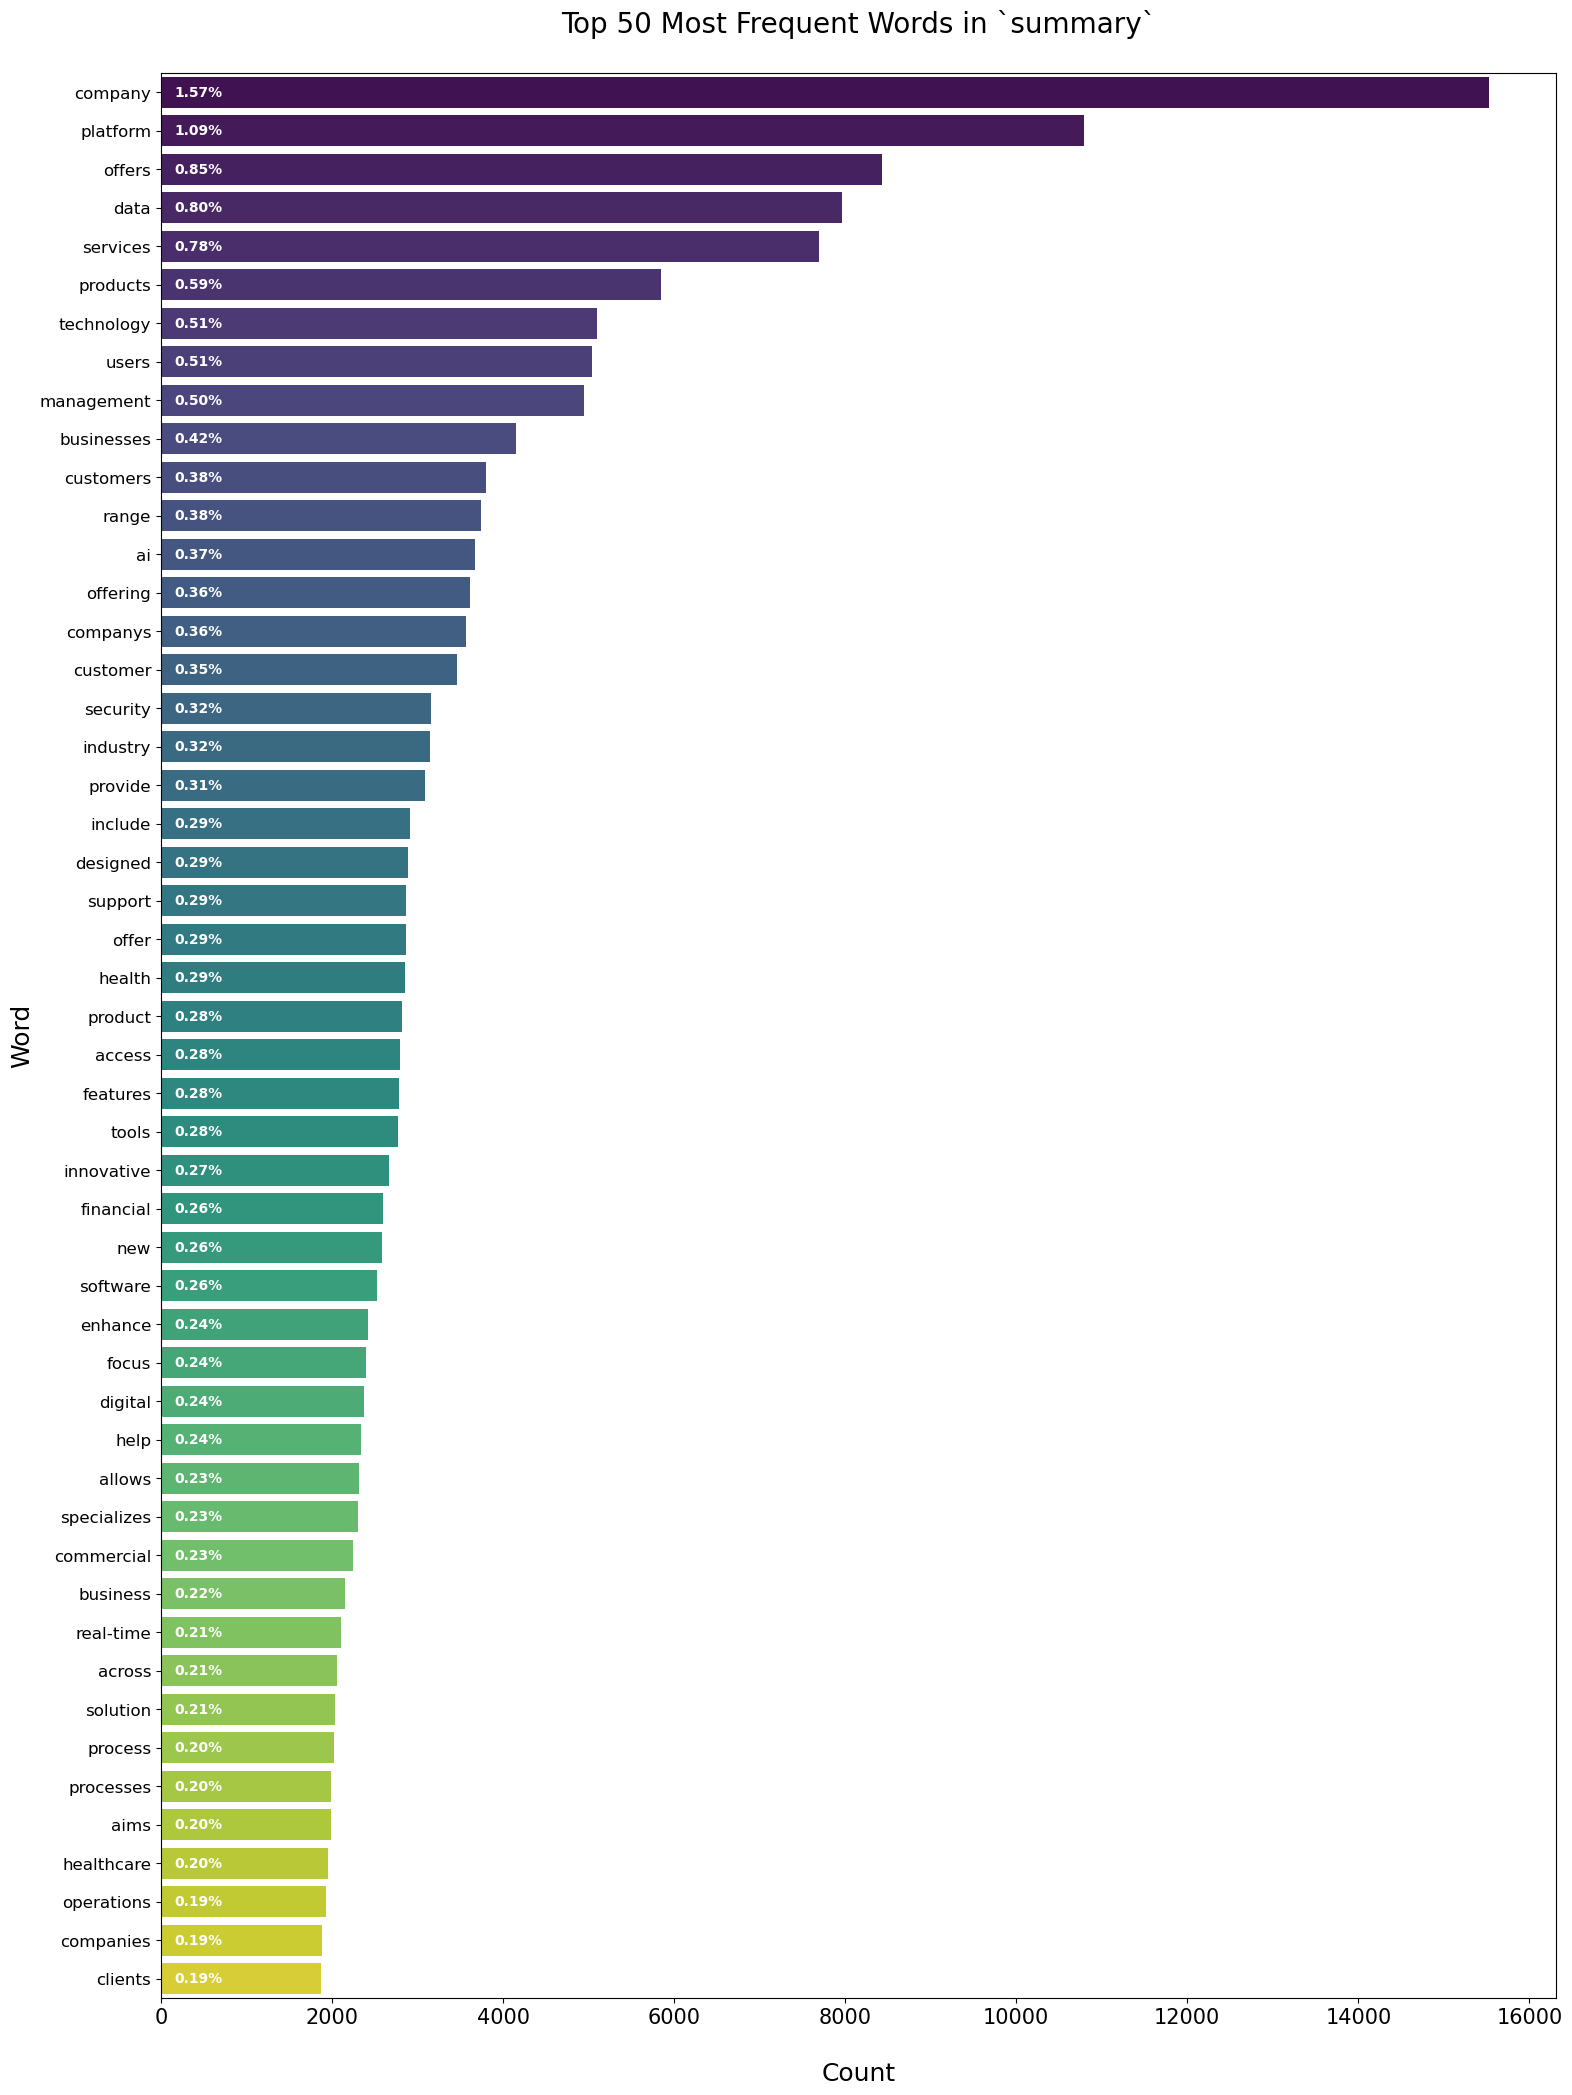

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import requests
import re

response = requests.get("https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords")
stop_words = response.content.decode('utf-8').split('\n')[:-1]

# Block additional words
stop_words.extend(['various','including','provides','providing','based','real','tomorrows','delivering','mastering','securely','made','igniting','uniting','crafting','minds','ignite','bridging','vision','accelerate','unveiling','delivered','connection','step','also','like','one','time','-','unleashing','unleash','future','potential','revolutionizing','success','transforming','power','elevate','elevating','unlocking','care','simplifying','precision','world','effortlessly','innovation','empowering','connecting','securing','experience','simplified','powering','solutions','insights','growth','accelerating','confidence','savor','home','futures','possibilities','tomorrow','journey','innovating','shaping','master','drive','beyond','driving','unlock','every','click','transform','navigating','redefining','discover','empower'])

def clean(text):
    # Make lowercase and remove non-alphabetical words
    text = re.sub(r'[^a-z\s-]', '', text.lower())
    
    # Tokenize
    tokens = text.split()
    
    # Remove non-meaningful words (and,the,but,now...)
    return [word for word in tokens if word not in stop_words]

def get_counts(text_series):
    # Combine sentences
    combined_text = ' '.join(text_series)
    
    # Clean and tokenize the combined text
    cleaned_words = clean(combined_text)
    
    # Word count
    return Counter(cleaned_words)

# Top N words
def top(counts, N):
    total_words = sum(counts.values())
    return [(word, count, (count / total_words) * 100) for word, count in counts.most_common(N)]

# Plot
def plot_word_freq(words, N, column):
    word_freq_df = pd.DataFrame(words, columns=['Word', 'Count', 'Freq'])
    max_count = word_freq_df['Count'].max()
    
    plt.figure(figsize=(18, 25))

    # Counts
    sns.barplot(y='Word', x='Count', data=word_freq_df, palette='viridis')
    
    # Frequencies
    for word, row in word_freq_df.iterrows():
        plt.text(0.01*max_count, word, f"{row['Freq']:.2f}%", color='white', ha='left', va='center', fontweight='bold')

    plt.title(f'Top {N} Most Frequent Words in `{column}`\n', fontsize=20)
    plt.xlabel('\nCount', fontsize=18)
    plt.ylabel('Word', fontsize=18)
    plt.xticks(fontsize = 15) 
    plt.yticks(fontsize = 12) 
    plt.savefig(f'visualization/top-{N}-frequent-in-{column}.png')
    plt.show()
    
def main():
    df = pd.read_csv('datasets/profiles.csv')
    column = 'summary'

    df_concepts = df[column]
    df_concepts = df_concepts.str.replace(r'[\[\]]', '', regex=True)
    
    N = 50
    freq = False
    
    word_counts = get_counts(df_concepts)
    top_words = top(word_counts, N)
    
    plot_word_freq(top_words, N, column)
    
if __name__ == '__main__':
    main()